# Question 2
How does household type vs. location affect our target market? (can these factors increase or decrease our product value?)

In [1]:
#Dependencies
import requests
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read CSV file 
file= "../Outputs/US_Census_Households.csv"
US_Households_df= pd.read_csv(file)
US_Households_df

,City,State,Total Estimate,Married Households,Male Unmarried Household,Female Unmarried Household,Nonfamily Household
0,Auburn,Alabama,29136,13886,1034,2484,11732
1,Birmingham,Alabama,87570,18910,4355,19476,44829
2,Dothan,Alabama,30301,11998,1208,5818,11277
3,Hoover,Alabama,36721,21668,1488,2059,11506
4,Huntsville,Alabama,96551,39641,4259,10487,42164
...,...,...,...,...,...,...,...
567,Milwaukee,Wisconsin,232362,58247,16688,50756,106671
568,Oshkosh,Wisconsin,28532,10450,1566,2232,14284
569,Racine,Wisconsin,30885,8965,1801,7624,12495
570,Waukesha,Wisconsin,31139,13132,1416,3694,12897


In [3]:
# Sort the data in descending order to determine the cities with the highest total estimated households
# display the top 10 cities to consider
descend_data=US_Households_df.sort_values('Total Estimate', ascending= False)
descend_data.head(10)


,City,State,Total Estimate,Married Households,Male Unmarried Household,Female Unmarried Household,Nonfamily Household
389,New York,New York,3263895,1143898,184937,563707,1371353
88,Los Angeles,California,1410594,527979,102884,196583,583148
254,Chicago,Illinois,1139537,364420,54991,160864,559262
485,Houston,Texas,924981,331597,58866,151876,382642
436,Philadelphia,Pennsylvania,660921,185642,34389,132467,308423
17,Phoenix,Arizona,602039,250761,46825,87436,217017
512,San Antonio,Texas,549245,220989,36298,98174,193784
474,Dallas,Texas,536008,181508,31244,75253,248003
130,San Diego,California,521000,227133,23811,53380,216676
464,Austin,Texas,449399,161423,14372,34720,238884


In [4]:
# create a dataframe that only looks at the top 10 cities (based off of 'Total Estimate')
top10_df= descend_data.iloc[:10]
top10_df.reset_index()

,index,City,State,Total Estimate,Married Households,Male Unmarried Household,Female Unmarried Household,Nonfamily Household
0,389,New York,New York,3263895,1143898,184937,563707,1371353
1,88,Los Angeles,California,1410594,527979,102884,196583,583148
2,254,Chicago,Illinois,1139537,364420,54991,160864,559262
3,485,Houston,Texas,924981,331597,58866,151876,382642
4,436,Philadelphia,Pennsylvania,660921,185642,34389,132467,308423
5,17,Phoenix,Arizona,602039,250761,46825,87436,217017
6,512,San Antonio,Texas,549245,220989,36298,98174,193784
7,474,Dallas,Texas,536008,181508,31244,75253,248003
8,130,San Diego,California,521000,227133,23811,53380,216676
9,464,Austin,Texas,449399,161423,14372,34720,238884


In [5]:
#find the max() of each household type from your narrowed down data 
married_max= top10_df['Married Households'].max()
male_unmarried_max= top10_df['Male Unmarried Household'].max()
female_unmarried_max= top10_df['Female Unmarried Household'].max()
nonfamily_max= top10_df['Nonfamily Household'].max()

#create a DataFrame of these max values called max_household_df
max_household_df=({
    "Married Max":married_max,
    "Male Unmarried Max":male_unmarried_max,
    "Female Unmarried Max":female_unmarried_max,
    "Nonfamily Max":nonfamily_max
    
})

max_household_df

{'Married Max': 1143898,
 'Male Unmarried Max': 184937,
 'Female Unmarried Max': 563707,
 'Nonfamily Max': 1371353}

In [6]:
#delete the 'Total Estimate' column to look at the specific household types
del top10_df['Total Estimate']


In [7]:
#set "City" as your index
top10_df.set_index('City', inplace= True)

<AxesSubplot:title={'center':'Frequency of HouseHold Types in US Cities'}, xlabel='Cities', ylabel='# of Households'>

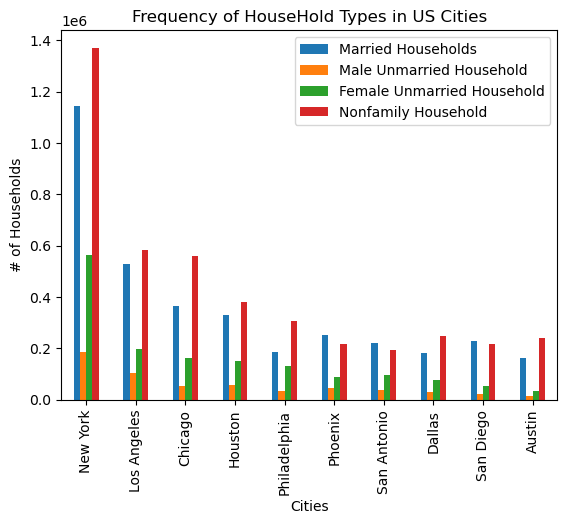

In [8]:
# create a grouped bar chart to visualize and compare the different household types for the top 10 cities 

top10_df.plot(kind= 'bar', xlabel= 'Cities', ylabel= '# of Households', title= 'Frequency of HouseHold Types in US Cities')




In [ ]:
# create a grouped bar chart to visualize and compare the different household types for the top 10 cities 

married= top10_df.groupby(['City'])['Married Households'].unique()
male_unmarried= top10_df.groupby(['City'])['Male Unmarried Household'].unique()
female_unmarried=top10_df.groupby(['City'])['Female Unmarried Household'].unique()
nonfamily=top10_df.groupby(['City'])['Nonfamily Household'].unique()


plt.bar(married,height=, label= 'Married Household')
plt.bar(male_unmarried,height= , label= 'Male Unmarried Household')
plt.bar(female_unmarried,height= ,label= 'Female Unmarried Household')
plt.bar(nonfamily,height= , label= 'Nonfamily Household ')
plt.xlabel('Cities')
plt.ylabel('# of Households')
plt.legend()
plt.show()

In [ ]:
married= top10_df.groupby(['City'])['Married Households'].unique()
married